In [ ]:
 !pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datasets

In [ ]:
dataset = datasets.load_dataset('tweets_hate_speech_detection')

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'tweet'],
        num_rows: 31962
    })
})

In [ ]:
dataset['train']['tweet'][13]

"@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  "

In [ ]:
dataset['train']['label'][13]

1

# Preprocess data

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
sw = stopwords.words('english') + ['@user', 'amp', '&amp', '\'', 'u']

In [ ]:
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer('basic_english')

def split_tokens(row):
  tokens = tokenizer(row['tweet'])
  tokens = [t for t in tokens if t not in sw]
  row['tokens'] = tokens

  return row

In [ ]:
dataset = dataset.map(split_tokens)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'tweet', 'tokens'],
        num_rows: 31962
    })
})

In [ ]:
dataset['train']['tweet'][1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [ ]:
dataset['train']['tokens'][1]

['thanks',
 '#lyft',
 'credit',
 'use',
 'cause',
 'offer',
 'wheelchair',
 'vans',
 'pdx',
 '.',
 '#disapointed',
 '#getthanked']

In [ ]:
from collections import Counter

In [ ]:
all_tokens = []

for tokens in dataset['train']['tokens']:
  all_tokens.extend(tokens)

In [ ]:
counts = Counter(all_tokens)

In [ ]:
counts.most_common(10)

[('.', 24754),
 ('!', 14650),
 (',', 6349),
 ('?', 2600),
 ('day', 2010),
 ('happy', 1541),
 ('#love', 1468),
 ('-', 1334),
 ('love', 1201),
 ('time', 1087)]

In [ ]:
vocab = [t for t, c in counts.items() if c > 10]
vocab

['father',
 'kids',
 '.',
 '#run',
 'thanks',
 'credit',
 'use',
 'cause',
 'offer',
 'bihday',
 '#model',
 'love',
 'take',
 'time',
 'urð\x9f\x93±',
 '!',
 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91',
 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 'factsguide',
 'society',
 '#motivation',
 'huge',
 'fan',
 'big',
 'talking',
 'leave',
 'pay',
 'get',
 'camping',
 'tomorrow',
 'next',
 'school',
 'year',
 'exams',
 'think',
 'ð\x9f\x98\xad',
 '#school',
 '#hate',
 '#girl',
 'land',
 '#cavs',
 '#cleveland',
 'â\x80¦',
 'welcome',
 'â\x86\x9d',
 '#ireland',
 'consumer',
 'price',
 'index',
 '(',
 'mom',
 ')',
 'previous',
 '0',
 '2%',
 '5%',
 'may',
 '#blog',
 '#silver',
 '#gold',
 '#forex',
 '#orlando',
 '#pulseshooting',
 '#orlandoshooting',
 '#heabreaking',
 '#love',
 '#',
 'see',
 'daddy',
 'today',
 '#cnn',
 'calls',
 'middle',
 'build',
 'wall',
 '#tcot',
 'comment',
 '#australia',
 '#seashepherd',
 '#omg',
 'thankful',
 'paner',
 '#thankful',
 '#positive',
 'retweet',
 'agree',
 '#fr

In [ ]:
len(vocab)

3366

In [ ]:
id2token = dict(enumerate(vocab))
id2token

{0: 'father',
 1: 'kids',
 2: '.',
 3: '#run',
 4: 'thanks',
 5: 'credit',
 6: 'use',
 7: 'cause',
 8: 'offer',
 9: 'bihday',
 10: '#model',
 11: 'love',
 12: 'take',
 13: 'time',
 14: 'urð\x9f\x93±',
 15: '!',
 16: 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91',
 17: 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 18: 'factsguide',
 19: 'society',
 20: '#motivation',
 21: 'huge',
 22: 'fan',
 23: 'big',
 24: 'talking',
 25: 'leave',
 26: 'pay',
 27: 'get',
 28: 'camping',
 29: 'tomorrow',
 30: 'next',
 31: 'school',
 32: 'year',
 33: 'exams',
 34: 'think',
 35: 'ð\x9f\x98\xad',
 36: '#school',
 37: '#hate',
 38: '#girl',
 39: 'land',
 40: '#cavs',
 41: '#cleveland',
 42: 'â\x80¦',
 43: 'welcome',
 44: 'â\x86\x9d',
 45: '#ireland',
 46: 'consumer',
 47: 'price',
 48: 'index',
 49: '(',
 50: 'mom',
 51: ')',
 52: 'previous',
 53: '0',
 54: '2%',
 55: '5%',
 56: 'may',
 57: '#blog',
 58: '#silver',
 59: '#gold',
 60: '#forex',
 61: '#orlando',
 62: '#pulseshooting',
 63: '#orlandoshooting',
 64: 

In [ ]:
token2id = {v: k for k, v in id2token.items()}
token2id

{'father': 0,
 'kids': 1,
 '.': 2,
 '#run': 3,
 'thanks': 4,
 'credit': 5,
 'use': 6,
 'cause': 7,
 'offer': 8,
 'bihday': 9,
 '#model': 10,
 'love': 11,
 'take': 12,
 'time': 13,
 'urð\x9f\x93±': 14,
 '!': 15,
 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91': 16,
 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦': 17,
 'factsguide': 18,
 'society': 19,
 '#motivation': 20,
 'huge': 21,
 'fan': 22,
 'big': 23,
 'talking': 24,
 'leave': 25,
 'pay': 26,
 'get': 27,
 'camping': 28,
 'tomorrow': 29,
 'next': 30,
 'school': 31,
 'year': 32,
 'exams': 33,
 'think': 34,
 'ð\x9f\x98\xad': 35,
 '#school': 36,
 '#hate': 37,
 '#girl': 38,
 'land': 39,
 '#cavs': 40,
 '#cleveland': 41,
 'â\x80¦': 42,
 'welcome': 43,
 'â\x86\x9d': 44,
 '#ireland': 45,
 'consumer': 46,
 'price': 47,
 'index': 48,
 '(': 49,
 'mom': 50,
 ')': 51,
 'previous': 52,
 '0': 53,
 '2%': 54,
 '5%': 55,
 'may': 56,
 '#blog': 57,
 '#silver': 58,
 '#gold': 59,
 '#forex': 60,
 '#orlando': 61,
 '#pulseshooting': 62,
 '#orlandoshooting': 63,
 '#he

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'tweet', 'tokens'],
        num_rows: 31962
    })
})

In [ ]:
dataset['train']['tokens'][0]

['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 '.',
 '#run']

In [ ]:
def remove_rare_tokens(row):
  row['filtered_tokens'] = [t for t in row['tokens'] if t in vocab]
  return row

In [ ]:
dataset = dataset.map(remove_rare_tokens)
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'tweet', 'tokens', 'filtered_tokens'],
        num_rows: 31962
    })
})

In [ ]:
dataset['train']['tweet'][0]

'@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [ ]:
dataset['train']['filtered_tokens'][0]

['father', 'kids', '.', '#run']

In [ ]:
dataset['train']['tokens'][0]

['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 '.',
 '#run']

In [ ]:
def windowizer(row, wsize=2):
  doc = row['filtered_tokens']
  out = []

  for i, token in enumerate(doc):
    target = token2id[token]

    window = []

    for j in range(-wsize, wsize+1):
      index = i+j

      if index < 0 or index >= len(doc) or j == 0:
        continue

      window.append(index)

    out.extend([(target, token2id[doc[wi]]) for wi in window])

  row['moving_window'] = out
  return row


In [ ]:
dataset = dataset.map(windowizer)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'tweet', 'tokens', 'filtered_tokens', 'moving_window'],
        num_rows: 31962
    })
})

In [ ]:
dataset['train']['tweet'][12345]

"got a @user t-shi and mini-sticker for father's day!!  just need to get a magnet to complete the collection!   "

In [ ]:
dataset['train']['moving_window'][12345]

[[233, 0],
 [233, 115],
 [0, 233],
 [0, 115],
 [0, 15],
 [115, 233],
 [115, 0],
 [115, 15],
 [115, 15],
 [15, 0],
 [15, 115],
 [15, 15],
 [15, 179],
 [15, 115],
 [15, 15],
 [15, 179],
 [15, 27],
 [179, 15],
 [179, 15],
 [179, 27],
 [179, 735],
 [27, 15],
 [27, 179],
 [27, 735],
 [27, 1624],
 [735, 179],
 [735, 27],
 [735, 1624],
 [735, 15],
 [1624, 27],
 [1624, 735],
 [1624, 15],
 [15, 735],
 [15, 1624]]

In [ ]:
id2token[179]

'need'

In [ ]:
class Word2VecDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        # self.vocab_size = vocab_size
        self.data = [i for s in dataset['moving_window'] for i in s]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
dt = Word2VecDataset(dataset['train'])

In [ ]:
dt[1]

[0, 2]

In [ ]:
dataloader = DataLoader(Word2VecDataset(dataset['train']),
                        batch_size=512,
                        shuffle=True)

In [ ]:
import torch
from torch import nn

embed_test = nn.Embedding(20, 10)

In [ ]:
embed_test(torch.tensor(5))

tensor([-0.2566, -0.3631, -0.6937,  0.5300, -0.0678, -2.6189,  0.8236,  0.8557,
        -0.7806,  0.7532], grad_fn=<EmbeddingBackward0>)

In [ ]:
from torch import nn

class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_size):
        super().__init__()

        self.embed = nn.Embedding(vocab_size, embedding_size)
        self.expand = nn.Linear(embedding_size, vocab_size, bias=False)

    def forward(self, input):
        hidden = self.embed(input)
        out = self.expand(hidden)

        return out

In [ ]:
EMBED_SIZE = 200
model = Word2Vec(len(vocab), EMBED_SIZE)

In [ ]:
len(vocab)

3366

In [ ]:
device = torch.device('cuda')
model.to(device)

LR = 3e-4
EPOCHS = 100

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

In [ ]:
from tqdm import tqdm

progress_bar = tqdm(range(EPOCHS*len(dataloader)))
running_loss = []

for epoch in range(EPOCHS):
  epoch_loss = 0
  for center, context in dataloader:
    # print('center', center.shape)
    # print('context', context.shape)
    center, context = center.to(device), context.to(device)

    optimizer.zero_grad()
    out = model(context)
    loss = loss_fn(out, center)

    epoch_loss += loss.item()

    loss.backward()
    optimizer.step()
    progress_bar.update(1)

  epoch_loss /= len(dataloader)
  running_loss.append(epoch_loss)



100%|█████████▉| 138594/138600 [04:39<00:00, 535.28it/s]

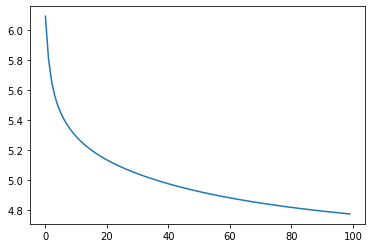

In [ ]:
import matplotlib.pyplot as plt
plt.plot(running_loss)

In [ ]:
wordvecs = model.expand.weight.cpu().detach().numpy()

In [ ]:
wordvecs.shape

(3366, 200)

In [ ]:
wordvecs[0]

array([ 2.39328463e-02,  1.33884549e-01, -2.70933956e-02,  6.25190325e-04,
       -4.36915383e-02,  1.19664501e-02, -7.06005320e-02,  7.46423528e-02,
       -4.55632359e-02,  5.83767816e-02, -1.81291595e-01,  9.06872749e-02,
        1.28446400e-01,  1.82808507e-02,  1.37087524e-01,  6.01850525e-02,
       -7.91112036e-02, -1.20013747e-02,  3.41140516e-02,  7.33155981e-02,
        1.44026279e-01, -9.19271111e-02, -7.65690058e-02, -8.62261206e-02,
        1.41900806e-02, -7.79601410e-02,  1.29389450e-01,  3.41922417e-02,
        3.30971815e-02,  4.12283130e-02, -7.78025985e-02,  1.59102812e-01,
       -5.81552200e-02, -7.43337125e-02, -4.72133420e-02,  8.39310959e-02,
        1.22537926e-01,  1.99657813e-01, -2.56207082e-02,  1.28382236e-01,
        2.80306172e-02, -2.38154516e-01, -8.46476778e-02,  2.36400701e-02,
       -2.36779362e-01, -1.91318467e-01, -1.67055175e-01,  9.66741145e-02,
        6.33535683e-02,  7.89934993e-02,  3.48631084e-01,  9.21551958e-02,
        2.87270129e-01, -

In [ ]:
id2token[0], id2token[1] 

('father', 'kids')

In [ ]:
wordvecs

array([[ 0.02393285,  0.13388455, -0.0270934 , ..., -0.08553296,
         0.11036144, -0.00287055],
       [-0.36127943,  0.07928079,  0.2615385 , ..., -0.06142649,
         0.14375503, -0.12015921],
       [ 0.14658779, -0.34418792,  0.1882083 , ..., -0.31071848,
        -0.15816933, -0.17716217],
       ...,
       [-0.36114028, -0.08759747, -0.22337593, ...,  0.3559799 ,
         0.34023085,  0.21328108],
       [-0.44675452, -0.11740471,  0.18920495, ...,  0.18004824,
         0.1011534 ,  0.33943033],
       [ 0.09043226,  0.24674618, -0.09592412, ...,  0.6483736 ,
         0.03993849,  0.16212882]], dtype=float32)

In [ ]:
t0 = wordvecs[0]
t1 = wordvecs[1]
t2 = wordvecs[2]

In [ ]:
from scipy.spatial import distance

distance.squareform(distance.pdist([t0, t1, t2], 'cosine'))

array([[0.        , 0.8568656 , 0.68660716],
       [0.8568656 , 0.        , 0.79619688],
       [0.68660716, 0.79619688, 0.        ]])

In [ ]:
distances = distance.squareform(distance.pdist(wordvecs, 'cosine'))

In [ ]:
distances.shape

(3366, 3366)

In [ ]:
distances[0]

array([0.        , 0.8568656 , 0.68660716, ..., 1.11236386, 1.17014224,
       1.20938786])

In [ ]:
import numpy as np

In [ ]:
np.argmin(distances[0])

0

In [ ]:
np.argsort(distances[0])

array([   0,  115,  868, ..., 3178, 3118, 3109])

In [ ]:
id2token[115]

'day'

In [ ]:
id2token[868]

'#fathersday'

In [ ]:
id2token[1]

'kids'

In [ ]:
np.argsort(distances[1])

array([   1,   95,   49, ...,  702, 1438,  701])

In [ ]:
id2token[49]

'('

In [ ]:
def most_similar(word):
  index = token2id[word]
  d = distances[index]
  index_sort = np.argsort(d)
  similar_indexes = index_sort[1:11]

  return [id2token[i] for i in similar_indexes]

In [ ]:
most_similar('father')

['day',
 '#fathersday',
 'fathers',
 'happy',
 'dad',
 'one',
 'love',
 ',',
 '#father',
 '.']

In [ ]:
most_similar('kids')

[',',
 '(',
 'day',
 'life',
 'world',
 'today',
 'tomorrow',
 'even',
 'people',
 'get']

In [ ]:
most_similar('trump')

['racist',
 'turned',
 'said',
 'donald',
 'america',
 'like',
 'guy',
 'comments',
 'nominee',
 'clinton']

In [ ]:
most_similar('life')

['.', ',', 'day', '!', '?', 'time', 'people', 'one', '-', 'like']

In [ ]:
most_similar('people')

['.', ',', '?', '!', 'like', 'get', '-', 'day', 'one', 'life']

In [ ]:
most_similar('racist')

['trump',
 '#trump',
 'women',
 'needs',
 '#hillary',
 'obama',
 'say',
 'like',
 'said',
 'comments']

In [ ]:
most_similar('.')

[',', '!', '?', 'day', 'today', '-', ')', 'like', 'people', 'get']

In [ ]:
most_similar('football')

['#euro2016',
 'fav',
 'church',
 'basketball',
 '#england',
 'town',
 'gov',
 'hero',
 'cried',
 'seem']

In [ ]:
most_similar('gov')

['rhymes',
 '#galib',
 'lyrics',
 'genocide',
 'excit',
 '3%',
 '#iqbal',
 '#eur/gbp',
 '#wasi',
 '#saysomething']

In [ ]:
most_similar('basketball')

['â\x80\x94anne',
 'wa',
 '#dwd',
 '#masterkeyexperience',
 'released',
 '#teambtsâ\x80¦',
 'mat',
 'officers',
 'materia',
 '#doplants']

In [ ]:
most_similar('russia')

['wa',
 '#feminismiscancer',
 '#boricuaâ\x80¦',
 'idiots',
 '#game7',
 'ignorant',
 '#saysomething',
 'condolences',
 'exam',
 'idk']

In [ ]:
most_similar('election')

['#liberal',
 '#fear',
 'whe',
 '#wetter',
 'rooster',
 'bitches',
 'finals',
 '#boricuaâ\x80¦',
 'talent',
 '#resources']

In [ ]:
most_similar('kill')

['protect',
 'poor',
 'crap',
 'muslims',
 'michelle',
 'giant',
 'heas',
 'turned',
 'jews',
 'obama']

In [ ]:
most_similar('murder')

['six',
 'justice',
 'mass',
 'groups',
 'jo',
 'british',
 'definition',
 'excit',
 '#iqbal',
 'expanse']

In [ ]:
most_similar('dog')

['cat',
 'fine',
 'alive',
 'food',
 'name',
 'mommy',
 'guy',
 'search',
 '#instacool',
 'takes']